In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from natsort import natsorted
import matplotlib.pyplot as plt
import decoupler as dc

sns.set_context("paper", font_scale=2) # set some nice global plotting settings.

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
tissue = 'PBMC'

In [3]:
plate_palette = sns.color_palette("husl", n_colors=2)
sex_palette = ['hotpink','dodgerblue']
geno_palette = ['#DA9CC1', '#F4C245', '#82976d', '#C0BFBF','#9999cc', '#9f6761', '#666699',  '#55AF5B', '#4F6EAF', '#52A5DB', '#D83026', '#683C91']


In [4]:
adata = sc.read_h5ad(f'../IGVF_analysis/cellbender_tissues/{tissue}_processed_subclustered.h5ad')



In [5]:
adata.obs.head()

lab_sample_id sample     plate  \
cellID                                                                
B6_B2_E1_Subpool_UDI09_igvf_013   087_CASTJ_10M_20     NA  igvf_013   
B6_D2_D7_Subpool_UDI09_igvf_013   087_CASTJ_10M_20     NA  igvf_013   
B2_H1_A12_Subpool_UDI09_igvf_013   067_NODJ_10M_20     NA  igvf_013   
G4_D10_H2_Subpool_UDI09_igvf_013   082_PWKJ_10F_20     NA  igvf_013   
H6_A7_H10_Subpool_UDI09_igvf_013  095_CASTJ_10M_20     NA  igvf_013   

                                        subpool SampleType Tissue     Sex  \
cellID                                                                      
B6_B2_E1_Subpool_UDI09_igvf_013   Subpool_UDI09      Cells   PBMC    Male   
B6_D2_D7_Subpool_UDI09_igvf_013   Subpool_UDI09      Cells   PBMC    Male   
B2_H1_A12_Subpool_UDI09_igvf_013  Subpool_UDI09      Cells   PBMC    Male   
G4_D10_H2_Subpool_UDI09_igvf_013  Subpool_UDI09      Cells   PBMC  Female   
H6_A7_H10_Subpool_UDI09_igvf_013  Subpool_UDI09      Cells   PBMC    Male   

                                     Age Genotype subpool_type  ...  \
cellID                                                          ...   
B6_B2_E1_Subpool_UDI09_igvf_013   PNM_02    CASTJ           NO  ...   
B6_D2_D7_Subpool_UDI09_igvf_013   PNM_02    CASTJ           NO  ...   
B2_H1_A12_Subpool_UDI09_igvf_013  PNM_02     NODJ           NO  ...   
G4_D10_H2_Subpool_UDI09_igvf_013  PNM_02     PWKJ           NO  ...   
H6_A7_H10_Subpool_UDI09_igvf_013  PNM_02    CASTJ           NO  ...   

                                 total_counts_mt_cb pct_counts_mt_cb  \
cellID                                                                 
B6_B2_E1_Subpool_UDI09_igvf_013              6297.0         5.112571   
B6_D2_D7_Subpool_UDI09_igvf_013              3208.0         4.550936   
B2_H1_A12_Subpool_UDI09_igvf_013             3357.0         7.081681   
G4_D10_H2_Subpool_UDI09_igvf_013             2458.0         5.902694   
H6_A7_H10_Subpool_UDI09_igvf_013             2163.0         5.901613   

                                 doublet_score predicted_doublet  \
cellID                                                             
B6_B2_E1_Subpool_UDI09_igvf_013       0.085339             False   
B6_D2_D7_Subpool_UDI09_igvf_013       0.085339             False   
B2_H1_A12_Subpool_UDI09_igvf_013      0.095238             False   
G4_D10_H2_Subpool_UDI09_igvf_013      0.097923              True   
H6_A7_H10_Subpool_UDI09_igvf_013      0.097923             False   

                                 background_fraction cell_probability  \
cellID                                                                  
B6_B2_E1_Subpool_UDI09_igvf_013             0.000024         0.999955   
B6_D2_D7_Subpool_UDI09_igvf_013             0.000043         0.999955   
B2_H1_A12_Subpool_UDI09_igvf_013            0.000042         0.999955   
G4_D10_H2_Subpool_UDI09_igvf_013            0.000072         0.999955   
H6_A7_H10_Subpool_UDI09_igvf_013            0.000055         0.999955   

                                     cell_size droplet_efficiency leiden  \
cellID                                                                     
B6_B2_E1_Subpool_UDI09_igvf_013   49417.773438           2.499367     23   
B6_D2_D7_Subpool_UDI09_igvf_013   32487.781250           2.175521     23   
B2_H1_A12_Subpool_UDI09_igvf_013  19065.060547           2.497264     15   
G4_D10_H2_Subpool_UDI09_igvf_013  64174.042969           0.643299     25   
H6_A7_H10_Subpool_UDI09_igvf_013  64756.738281           0.559731     23   

                                 leiden_R  
cellID                                     
B6_B2_E1_Subpool_UDI09_igvf_013        23  
B6_D2_D7_Subpool_UDI09_igvf_013        23  
B2_H1_A12_Subpool_UDI09_igvf_013       15  
G4_D10_H2_Subpool_UDI09_igvf_013       25  
H6_A7_H10_Subpool_UDI09_igvf_013       23  

[5 rows x 49 columns]

In [6]:
adata.var.head()

gene_id      gene_name     mt  highly_variable  \
gene_name                                                                    
4933401J01Rik  ENSMUSG00000102693.2  4933401J01Rik  False            False   
Gm26206        ENSMUSG00000064842.3        Gm26206  False            False   
Xkr4           ENSMUSG00000051951.6           Xkr4  False            False   
Gm18956        ENSMUSG00000102851.2        Gm18956  False            False   
Gm37180        ENSMUSG00000103377.2        Gm37180  False            False   

                      means  dispersions  dispersions_norm  
gene_name                                                   
4933401J01Rik  1.000000e-12          NaN               NaN  
Gm26206        5.341086e-06     0.817577         -1.580645  
Xkr4           1.735950e-02     1.956244          0.274713  
Gm18956        1.000000e-12          NaN               NaN  
Gm37180        6.601106e-05     2.824329          1.689180

In [7]:
def stacked_barplot_proportions(adata, cluster_key, var_key, fsize=(12, 6), annotations=True, reverse_order=False, custom_order=None, custom_colors=None):
    colors = sns.color_palette("husl", n_colors=len(adata[var_key].unique()))

    # Group the data by 'cluster_key' and 'var_key', count occurrences, and calculate proportions
    grouped_data = adata.groupby([cluster_key, var_key]).size().unstack().fillna(0)
    proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)

    # Apply custom order if provided
    if custom_order:
        proportions = proportions.loc[custom_order]
    if custom_colors:
        colors = custom_colors

    # Reverse the order of the DataFrame if reverse_order is True
    if reverse_order:
        proportions = proportions.iloc[::-1]
        m = adata.groupby([cluster_key]).size().to_frame().iloc[::-1]
    else:
        m = adata.groupby([cluster_key]).size().to_frame()

    #sns.set_style('white')
    # Create the stacked bar plot
    ax = proportions.plot(kind='barh', color=colors, stacked=True, figsize=fsize, width=0.8, edgecolor=None)

    if annotations:
        for i, txt in enumerate(m[0]):
            ax.text(0.875, i, txt, fontsize=14, va='center', transform=ax.get_yaxis_transform())

    plt.xlim(0, 1.15)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.set_xlabel("Proportion")
    ax.set_ylabel(cluster_key)
    ax.set_title(f'{var_key} by {cluster_key}')

    if annotations:
        ax.legend(title=var_key, bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax.get_legend().remove()

    ax.grid(False)
    
    plt.show()

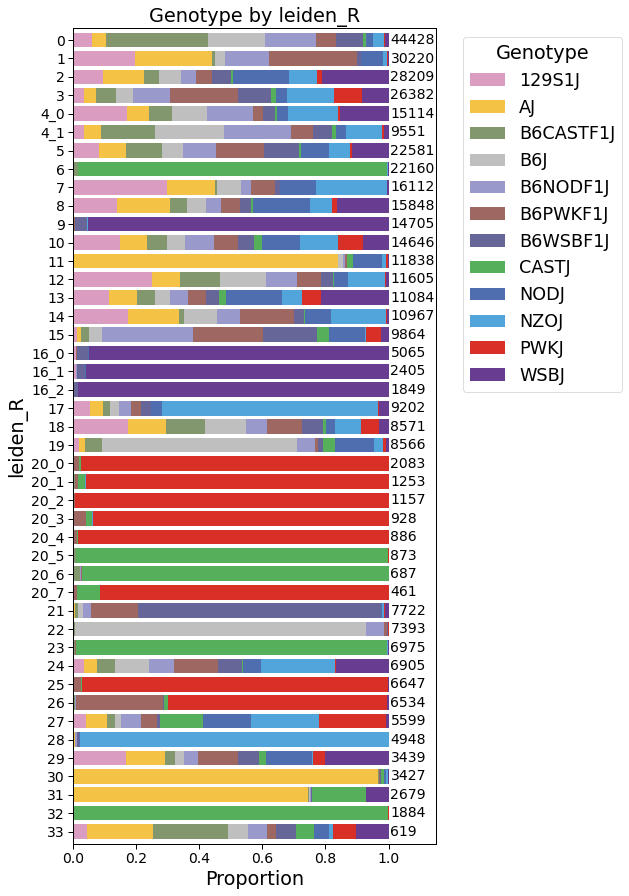

In [8]:
stacked_barplot_proportions(adata.obs, 
                            'leiden_R', 'Genotype',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = geno_palette,
                            annotations = True)


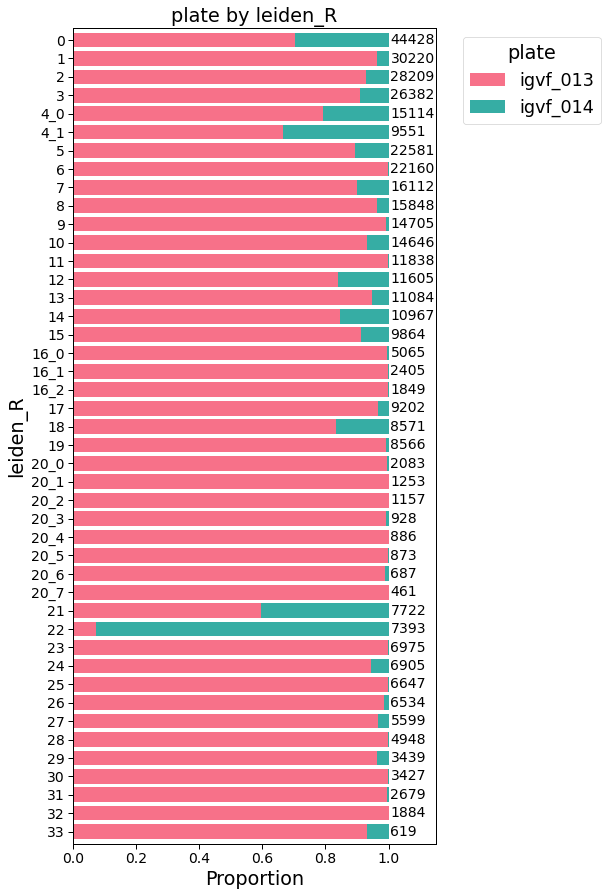

In [9]:
stacked_barplot_proportions(adata.obs, 
                            'leiden_R', 'plate',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = plate_palette,
                            annotations = True)


In [10]:
pbmc_marker_genes_dict = {
    "Basophil": ["Cd200r3", "Fcer1a", "Ms4a2"],
    "Dendritic_cell": ["Bst2", "Klk1", "Tcf4"],
    "Lymphoid": ["Bcl11a", "Cd19", "Ikzf1", "Ikzf3", "Ms4a1", "Pax5"],
    "Macrophage": ["C1qa"],
    "Monocyte": ["Cd14", "Cd44", "Fcgr3", "Ly6c1", "Ly6c2", "Lyz2"],
    "Neutrophil": ["S100a8", "S100a9"],
    "NK_cell": ["Prf1", "Gzma", "Il18rap", "Nkg7"],
    "RBC": ["Hba-a1", "Hba-a2", "Hbb-bs", "Hbb-bt"],
    "T_cell": ["Cd4", "Cd8a", "Foxp3"]
}


categories: 0, 1, 2, etc.
var_group_labels: Basophil, Dendritic_cell, Lymphoid, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


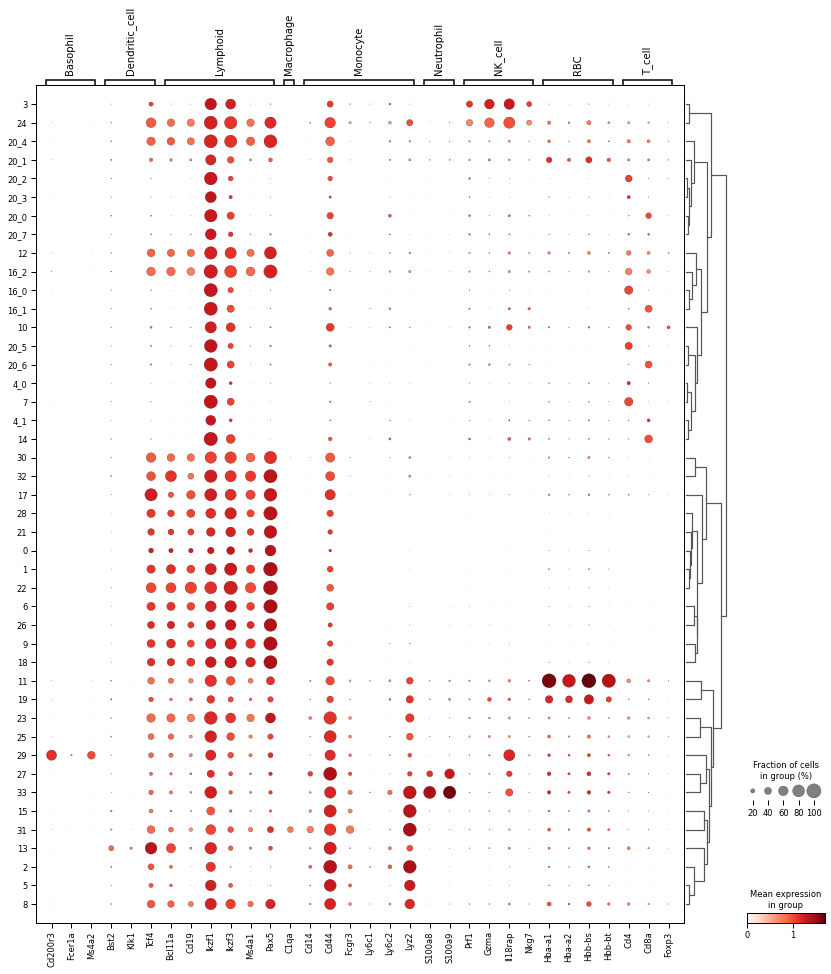

In [11]:

sc.pl.dotplot(adata, pbmc_marker_genes_dict, 'leiden_R', mean_only_expressed = True,
              dendrogram=True, log=True)


In [12]:
pbmc_marker_genes_dict = {
    "Basophil": ["Cd200r3", "Fcer1a", "Ms4a2", "Cma1", "Mcpt8"],
    "Dendritic_cell": ["Bst2", "Klk1", "Tcf4", "Cd74", "Itgax", "Siglech"],
    "Lymphoid": ["Bcl11a", "Cd19", "Ikzf1", "Ikzf3", "Ms4a1", "Pax5"],
    "Macrophage": ["C1qa", "Cd68", "Adgre1", "Mrc1"],
    "Monocyte": ["Cd14", "Cd44", "Fcgr3", "Ly6c1", "Ly6c2", "Lyz2", "Ccr2", "Cd36"],
    "Neutrophil": ["S100a8", "S100a9", "Ly6g", "Mpo", "Elane"],
    "NK_cell": ["Prf1", "Gzma", "Il18rap", "Nkg7", "Klrb1c", "Klra8"],
    "RBC": ["Hba-a1", "Hba-a2", "Hbb-bs", "Hbb-bt", "Alas2", "Gypa"],
    "T_cell": ["Cd4", "Cd8a", "Foxp3", "Cd3e", "Cd3g", "Ctla4", "Tcf7", "Cd69", "Il7r"],
    "B_cell": ["Cd19", "Cd79a", "Ms4a1", "Pax5", "Cd22", "Cd79b", "Spn", "Bank1", "Bcl6"],
    "Plasma_cell": ["Sdc1", "Ighm", "Igha", "Xbp1", "Mzb1", "Jchain"],
    "Treg_cell": ["Foxp3", "Ctla4", "Il2ra", "Tnfrsf18"],
    "Effector_T_cell": ["Ifng", "Gzmb", "Cxcr3", "Ccl5", "Fasl"],
    "Memory_T_cell": ["Cd44", "Il7r", "Sell", "Cxcr4"],
    "Naive_T_cell": ["Ccr7", "Sell", "Tcf7", "Il7r"],
    "Plasmacytoid_Dendritic_Cell": ["Siglech", "Bst2", "Ccr9", "Il3ra"],
    "Classical_Monocyte": ["Ly6c2", "Ccr2", "Fcgr3"],
    "Nonclassical_Monocyte": ["Ly6c1", "Trem2", "Cx3cr1"],
    "Intermediate_Monocyte": ["Ccr5", "Cx3cr1", "Fcgr1"],
}


categories: 0, 1, 2, etc.
var_group_labels: Basophil, Dendritic_cell, Lymphoid, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


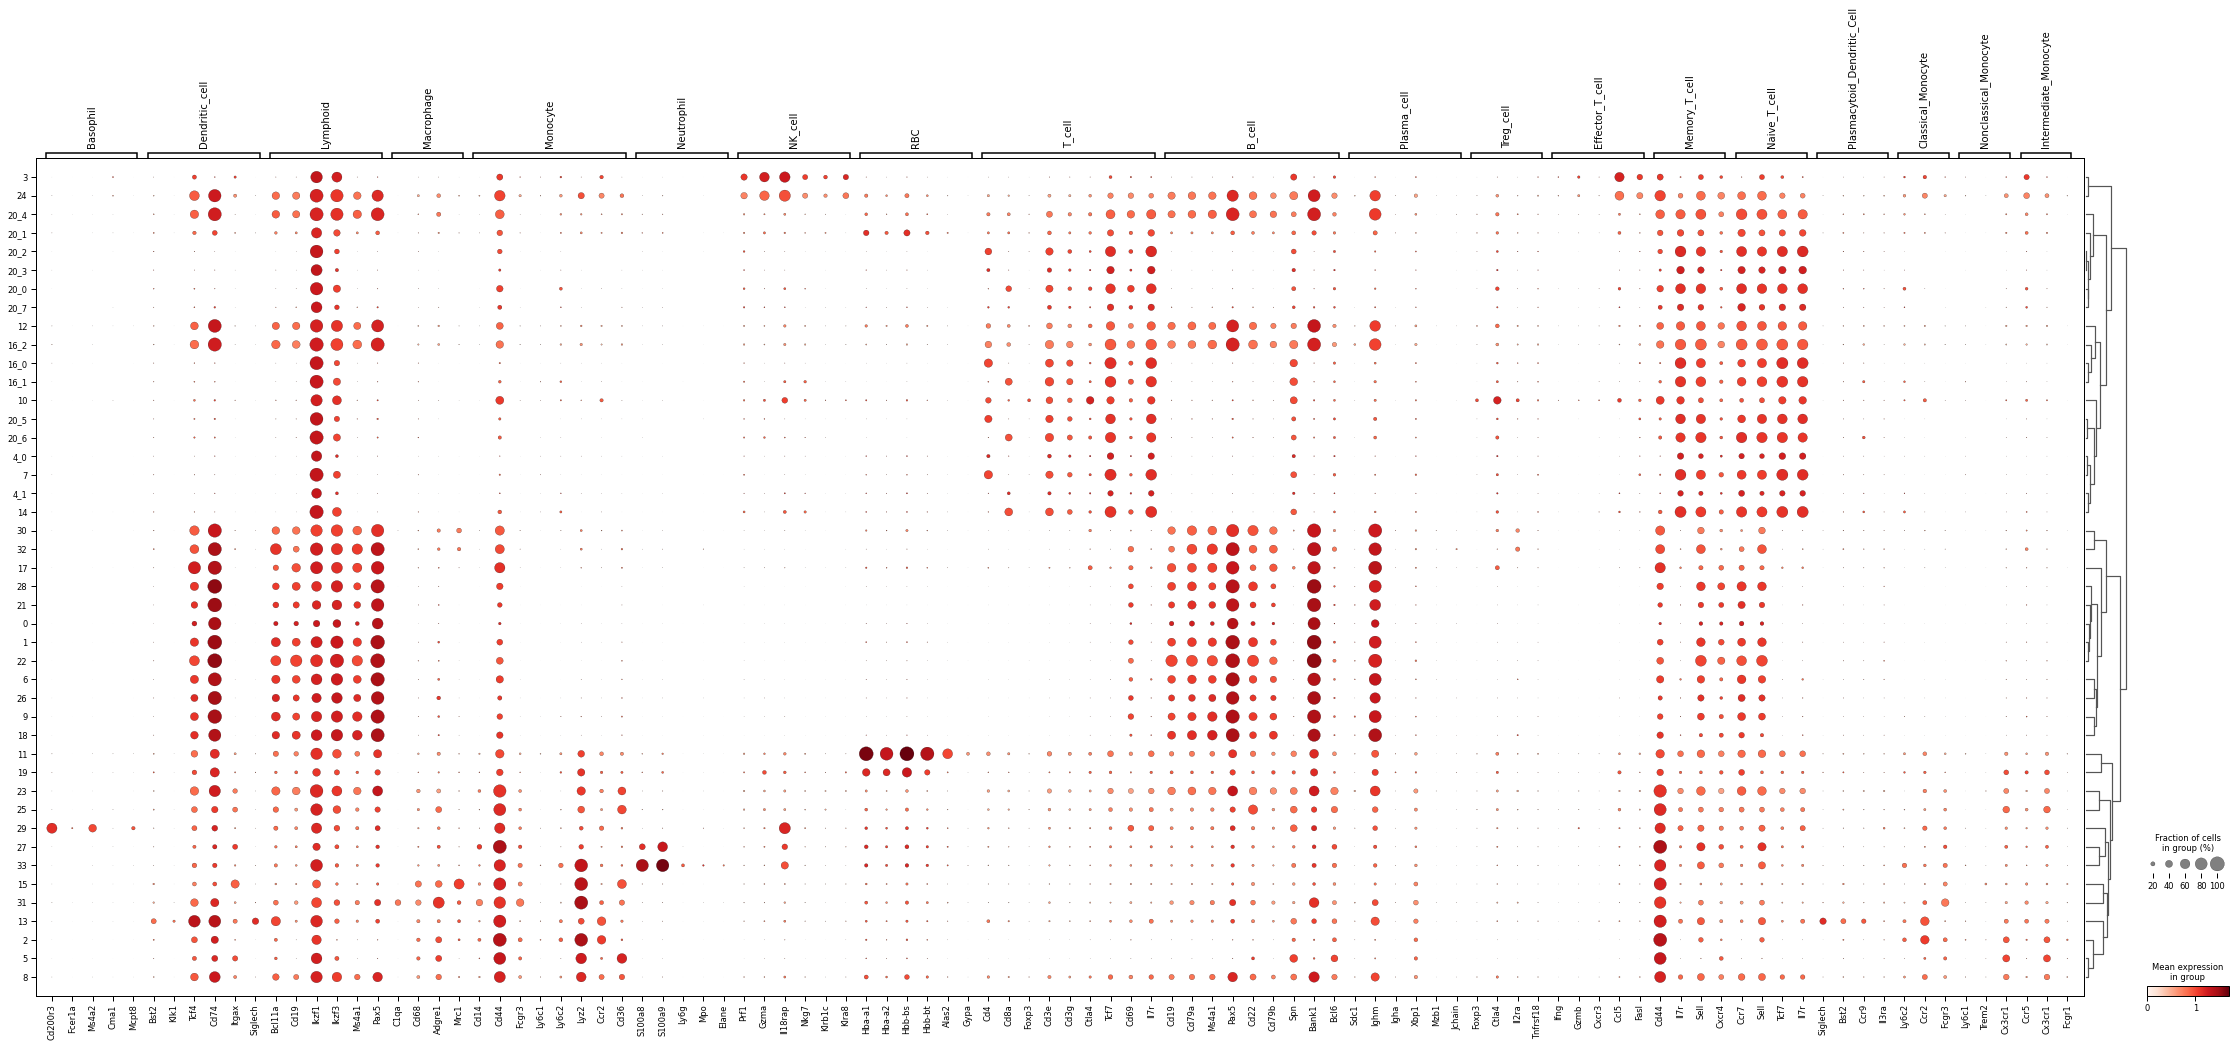

In [13]:
sc.pl.dotplot(adata, pbmc_marker_genes_dict, 'leiden_R', mean_only_expressed = True,
              dendrogram=True, log=True)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


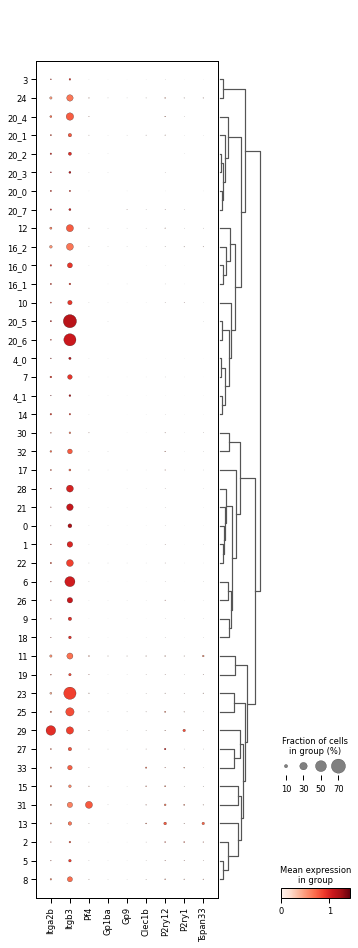

In [14]:
platelet_markers = [
    "Itga2b",
    "Itgb3",
    "Pf4",
    "Gp1ba",
    "Gp9",
    "Clec1b",
    "P2ry12",
    "P2ry1",
    "Tspan33"
]
sc.pl.dotplot(adata, platelet_markers, 'leiden_R', mean_only_expressed = True,
              dendrogram=True, log=True)


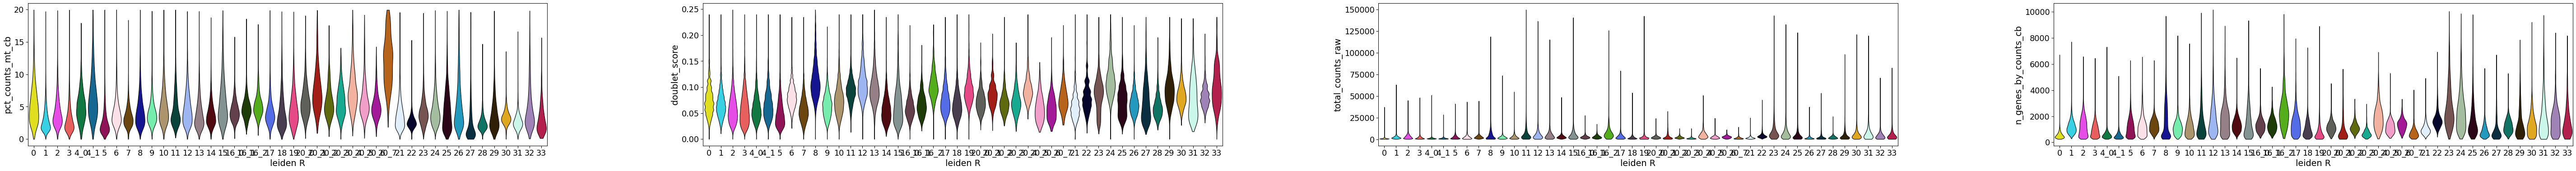

In [15]:
plt.rcParams['figure.figsize'] = (16, 6)

sc.pl.violin(adata, ['pct_counts_mt_cb', 'doublet_score', 'total_counts_raw', 'n_genes_by_counts_cb'],
             groupby = "leiden_R", 
             jitter=0.4, multi_panel=True, size=0)

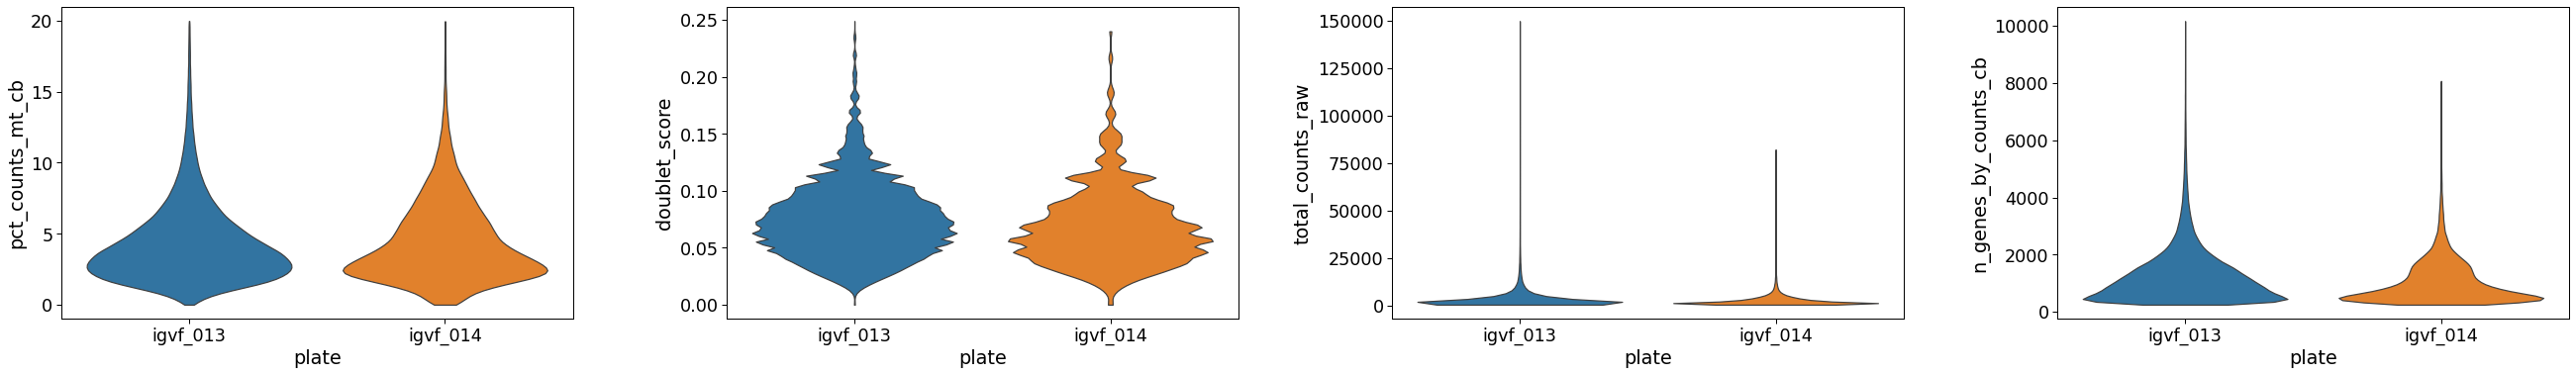

In [16]:
plt.rcParams['figure.figsize'] = (8, 6)

sc.pl.violin(adata, ['pct_counts_mt_cb', 'doublet_score', 'total_counts_raw', 'n_genes_by_counts_cb'],
             groupby = "plate", 
             jitter=0.4, multi_panel=True, size=0)

In [17]:
plt.rcParams['figure.figsize'] = (8, 8)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


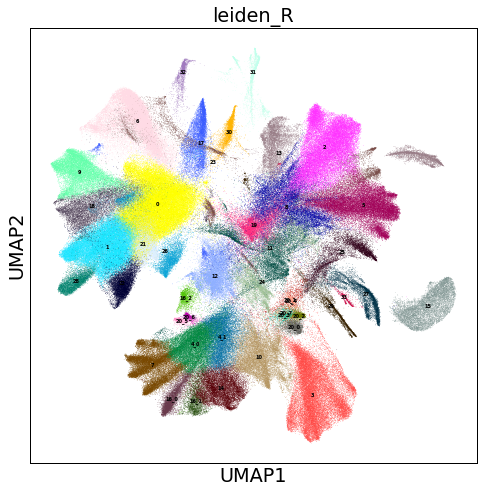

In [42]:
sc.pl.umap(adata, color=['leiden_R'], size=1, legend_fontsize = 5, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


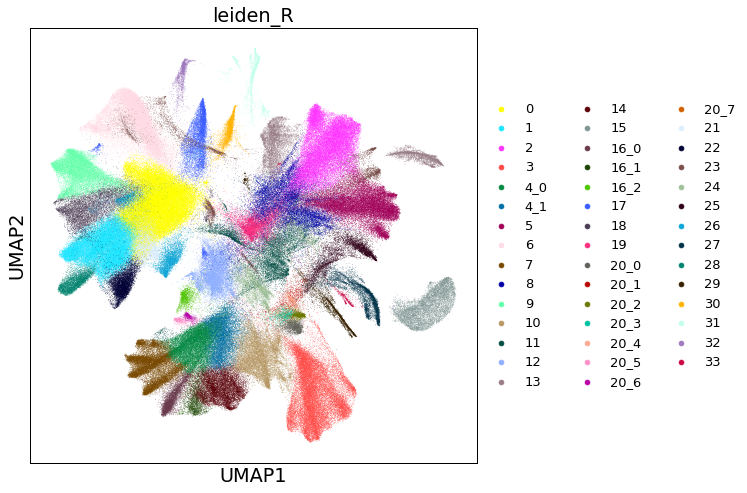

In [44]:
sc.pl.umap(adata, color=['leiden_R'], size=1, legend_fontsize = 13)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


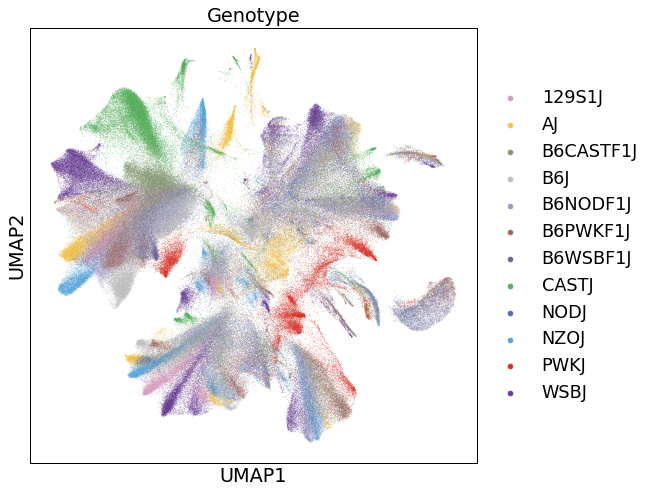

In [19]:
sc.pl.umap(adata, color=['Genotype'], size = 0.8, palette = geno_palette)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


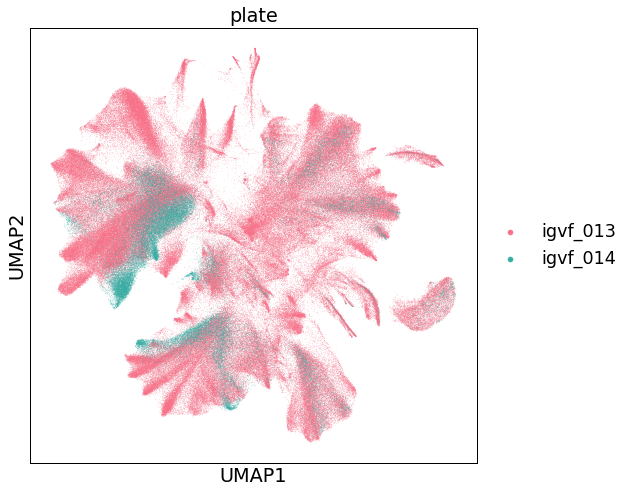

In [20]:
sc.pl.umap(adata, color=['plate'], size = 0.8, palette = plate_palette)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


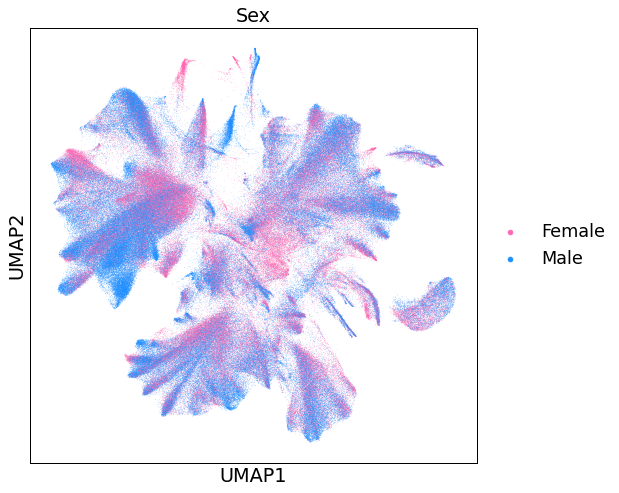

In [21]:
sc.pl.umap(adata, color=['Sex'], size = 0.8, palette = sex_palette)


In [22]:
adata

AnnData object with n_obs × n_vars = 424071 × 56953
    obs: 'lab_sample_id', 'sample', 'plate', 'subpool', 'SampleType', 'Tissue', 'Sex', 'Age', 'Genotype', 'subpool_type', 'Protocol', 'Chemistry', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'bc1_well', 'bc2_well', 'bc3_well', 'Row', 'Column', 'well_type', 'Mouse_Tissue_ID', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'ZT', 'Dissector', 'Tissue_weight_mg', 'Notes', 'n_genes_by_counts_raw', 'total_counts_raw', 'total_counts_mt_raw', 'pct_counts_mt_raw', 'n_genes_by_counts_cb', 'total_counts_cb', 'total_counts_mt_cb', 'pct_counts_mt_cb', 'doublet_score', 'predicted_doublet', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'leiden', 'leiden_R'
    var: 'gene_id', 'gene_name', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_R', 'log1p', 'neighbors', 'umap', 'dendrogram_leiden_R', 'leiden_R_colors', 'p

In [23]:
plt.rcParams['figure.figsize'] = (8, 8)


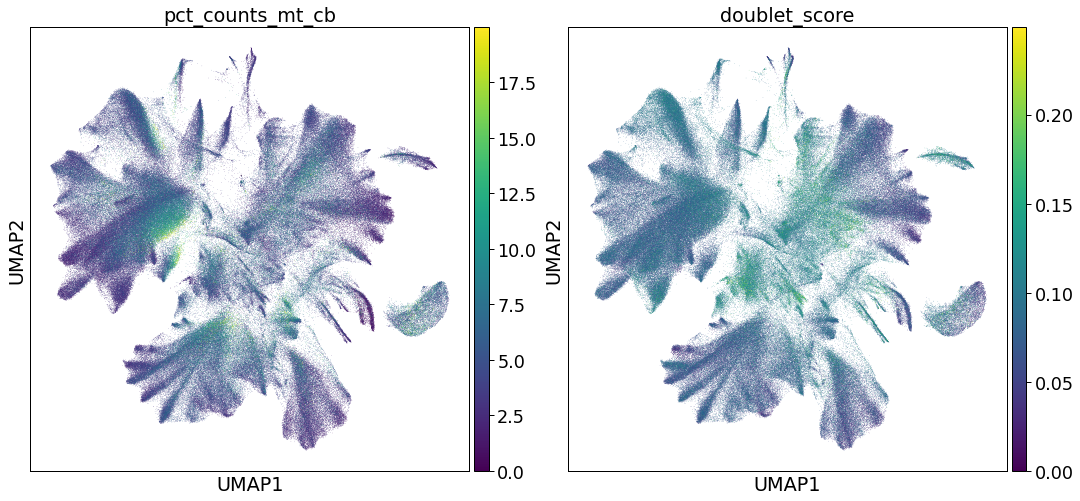

In [24]:
sc.pl.umap(adata, color=['pct_counts_mt_cb','doublet_score'], size = 0.8)


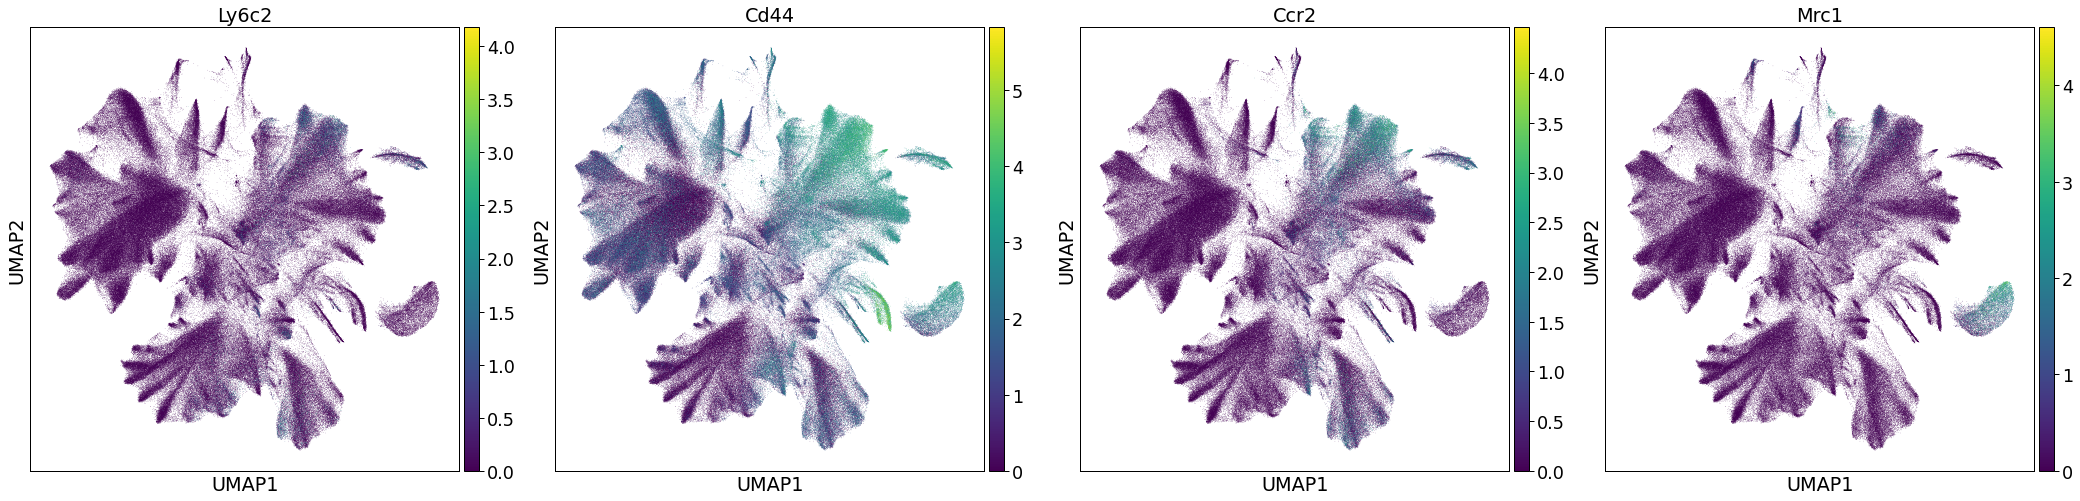

In [25]:
sc.pl.umap(adata, color=['Ly6c2','Cd44','Ccr2','Mrc1'], size = 0.8)


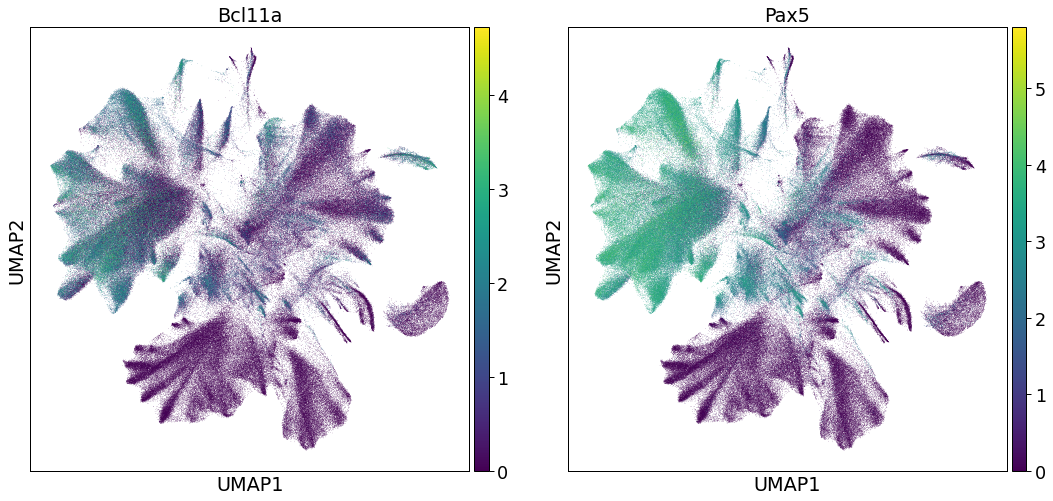

In [26]:
sc.pl.umap(adata, color=['Bcl11a','Pax5'], size = 0.8)


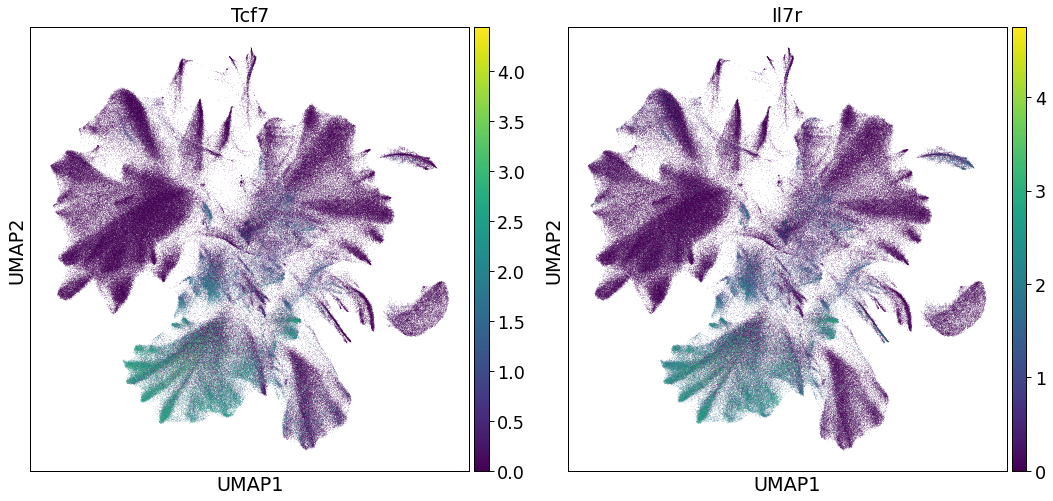

In [27]:
sc.pl.umap(adata, color=['Tcf7','Il7r'], size = 0.8)


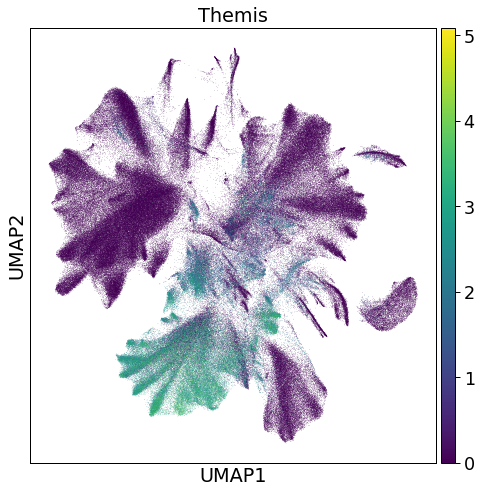

In [28]:
sc.pl.umap(adata, color=['Themis'], size = 0.8)


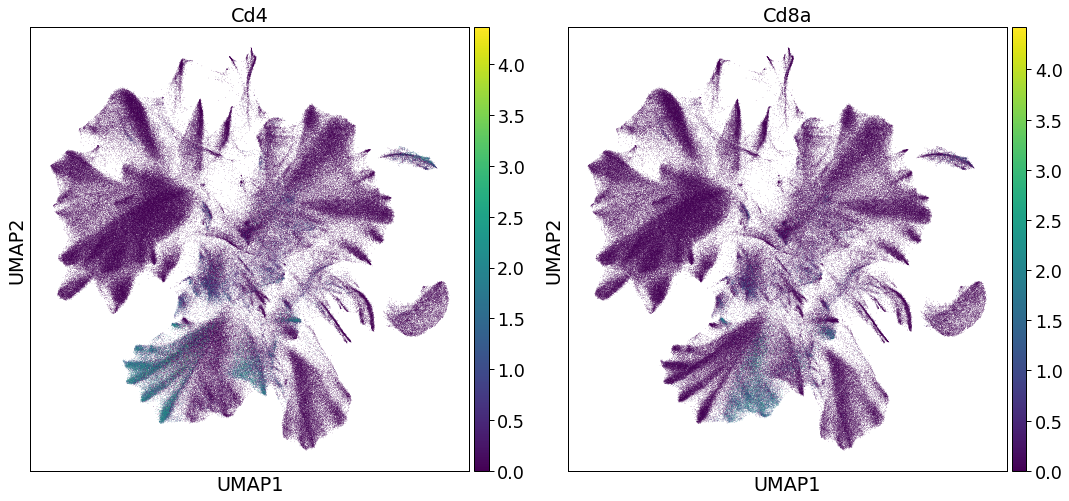

In [29]:
sc.pl.umap(adata, color=['Cd4','Cd8a'], size = 0.8)


In [30]:
old_annots = sc.read_h5ad("/share/crsp/lab/seyedam/share/igvf_splitseq/igvf_013/PBMC_annotated_processed.h5ad")
old_annots = old_annots.obs


In [31]:
old_annots['subpool'] = old_annots['sublibrary']

subpool_mapping = {
    "sub13a": "Subpool_UDI17",
    "sub13b": "Subpool_UDI18",
    "sub13c": "Subpool_UDI19",
    "sub13d": "Subpool_UDI20",
    "sub13e": "Subpool_UDI21",
    "sub13f": "Subpool_UDI22",
    "sub13g": "Subpool_UDI23",
    "sub13h": "Subpool_UDI24",
    
    "sub2": "Subpool_UDI02",
    "sub3": "Subpool_UDI03",
    "sub4": "Subpool_UDI04",
    "sub5": "Subpool_UDI05",
    "sub6": "Subpool_UDI06",
    "sub7": "Subpool_UDI07",
    "sub8": "Subpool_UDI08",
    "sub9": "Subpool_UDI09",
    "sub10":"Subpool_UDI10",
    "sub11":"Subpool_UDI11",
    "sub12":"Subpool_UDI12",
    "sub13":"Subpool_UDI13",
    "sub14":"Subpool_UDI14",
    "sub15":"Subpool_UDI15",
}

old_annots['subpool'] = old_annots['subpool'].map(subpool_mapping)

old_annots['cellID'] = old_annots['bc1_well'].astype(str) + "_" + old_annots['bc2_well'].astype(str) + "_" + old_annots['bc3_well'].astype(str) + "_" + old_annots['subpool'].astype(str)  + "_" + old_annots['Experiment'].astype(str) 



In [32]:
old_annots['subtypes'] = old_annots['subtypes'].astype(str)
old_annots['celltypes'] = old_annots['celltypes'].astype(str)

In [33]:
new_cells = adata.obs.index.tolist()
old_cells = old_annots['cellID'].tolist()

new_cells_series = pd.Series(new_cells)
old_cells_series = pd.Series(old_cells)


old_in_new = old_cells_series.isin(new_cells)
new_in_old = new_cells_series.isin(old_cells)


old_not_in_new = old_cells_series[~old_in_new]
new_not_in_old = new_cells_series[~new_in_old]

print(f"Number of old_cells not in new_cells: {len(old_not_in_new)}")

print(f"Number of new_cells not in old_cells: {len(new_not_in_old)}")


Number of old_cells not in new_cells: 29181
Number of new_cells not in old_cells: 88995


In [34]:
old_annots.set_index('cellID', inplace=True)
transfer_df = old_annots[['subtypes', 'celltypes']]

adata_obs = adata.obs.copy()

# Merge the dataframes, adding the 'subtype' and 'celltype' columns to adata.obs
adata_obs = adata_obs.join(transfer_df, how='left')


In [35]:
# Ensure missing values are explicitly set as NA
adata_obs['subtypes'].fillna(value="NA", inplace=True)
adata_obs['celltypes'].fillna(value="NA", inplace=True)

In [36]:
adata.obs['celltype_carryover'] = adata_obs['celltypes']
adata.obs['subtype_carryover'] = adata_obs['subtypes']


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


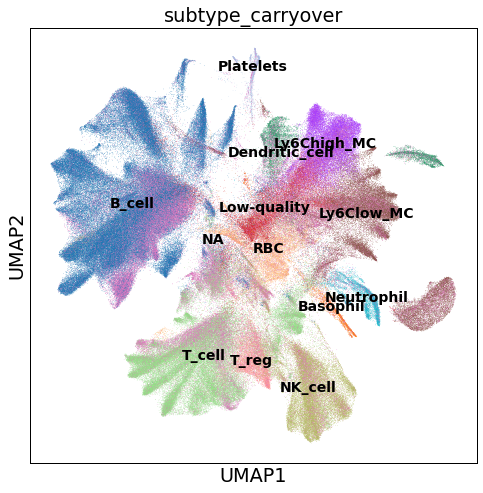

In [37]:
sc.pl.umap(adata, color=['subtype_carryover'], size = 1, legend_fontsize = 14, legend_loc = "on data")


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


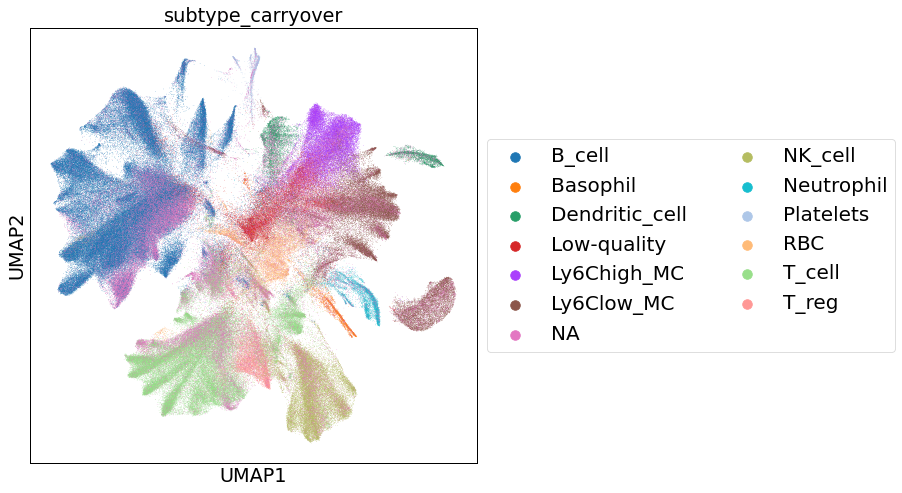

In [38]:
# Plot UMAP
ax = sc.pl.umap(adata, color=['subtype_carryover'], size=1, legend_fontsize=20, show=False)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), markerscale=2, fontsize=20, ncol=2)
plt.show()

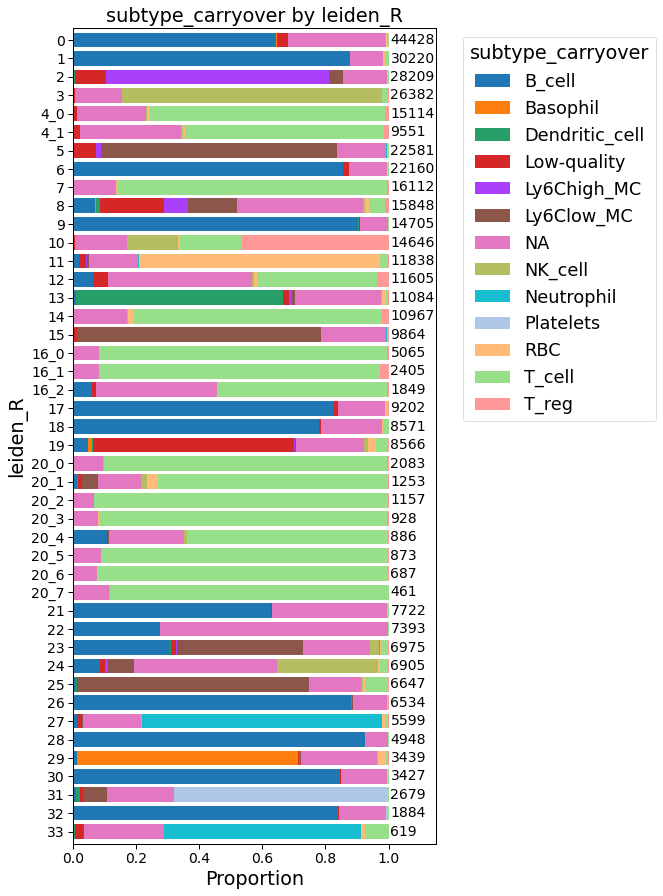

In [39]:
stacked_barplot_proportions(adata.obs, 
                            'leiden_R', 'subtype_carryover',
                            reverse_order = True,
                            custom_colors = adata.uns["subtype_carryover_colors"],
                            fsize = (6.5,15), 
                            annotations = True)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


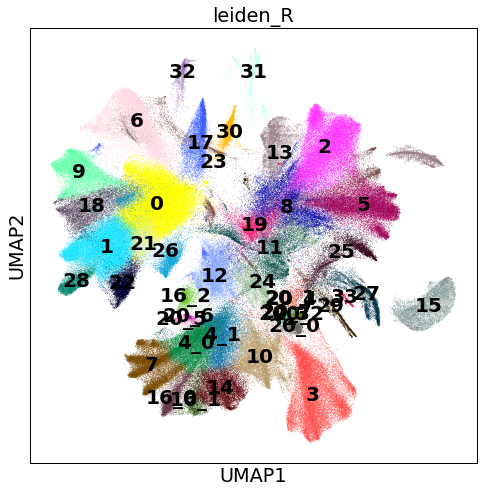

In [40]:
sc.pl.umap(adata, color=['leiden_R'], size=1, legend_fontsize = 20, legend_loc = 'on data')


In [ ]:
# adata.uns['log1p']["base"] = None # probably have to run this line, known scanpy bug.. https://github.com/scverse/scanpy/issues/2239#issuecomment-1104178881 


In [ ]:
# sc.tl.rank_genes_groups(adata, groupby="leiden_R", method="t-test")


In [ ]:
# sc.pl.rank_genes_groups_dotplot(
#     adata, groupby="leiden_R", standard_scale="var", n_genes=5
# )

# Annotate

In [45]:
annots = pd.read_csv("post_cellbender_annotations.csv")
annots = annots[annots['tissue'] == tissue]
annots['leiden_R'] = annots['leiden_R'].astype(str)

annotation_dict = annots.groupby('leiden_R').head(1).set_index('leiden_R')['general_celltype'].to_dict()
adata.obs['general_celltype'] = adata.obs['leiden_R'].map(annotation_dict)
annotation_dict = annots.groupby('leiden_R').head(1).set_index('leiden_R')['general_CL_ID'].to_dict()
adata.obs['general_CL_ID'] = adata.obs['leiden_R'].map(annotation_dict)

annotation_dict = annots.groupby('leiden_R').head(1).set_index('leiden_R')['celltype'].to_dict()
adata.obs['celltype'] = adata.obs['leiden_R'].map(annotation_dict)
annotation_dict = annots.groupby('leiden_R').head(1).set_index('leiden_R')['CL_ID'].to_dict()
adata.obs['CL_ID'] = adata.obs['leiden_R'].map(annotation_dict)

annotation_dict = annots.groupby('leiden_R').head(1).set_index('leiden_R')['subtype'].to_dict()
adata.obs['subtype'] = adata.obs['leiden_R'].map(annotation_dict)



/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


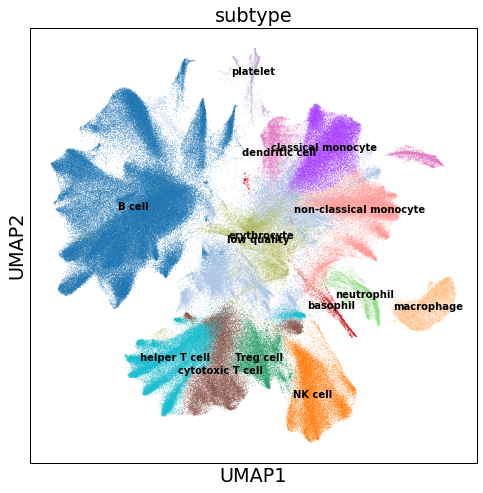

In [46]:
sc.pl.umap(adata, color=['subtype'], size=1, legend_fontsize = 10, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


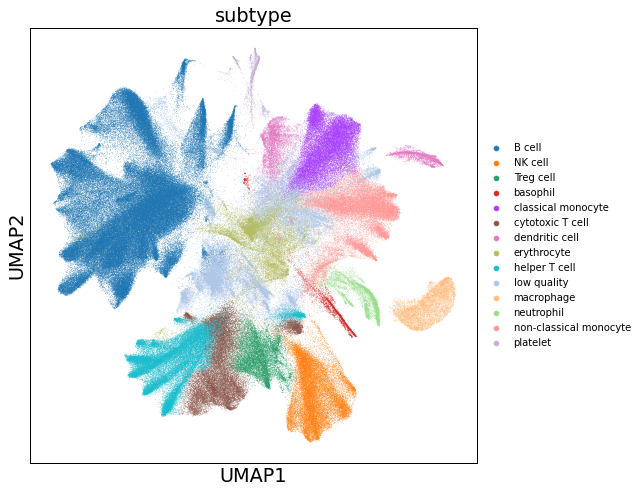

In [47]:
sc.pl.umap(adata, color=['subtype'], size=1, legend_fontsize = 10)


categories: B cell, NK cell, Treg cell, etc.
var_group_labels: Basophil, Dendritic_cell, Lymphoid, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


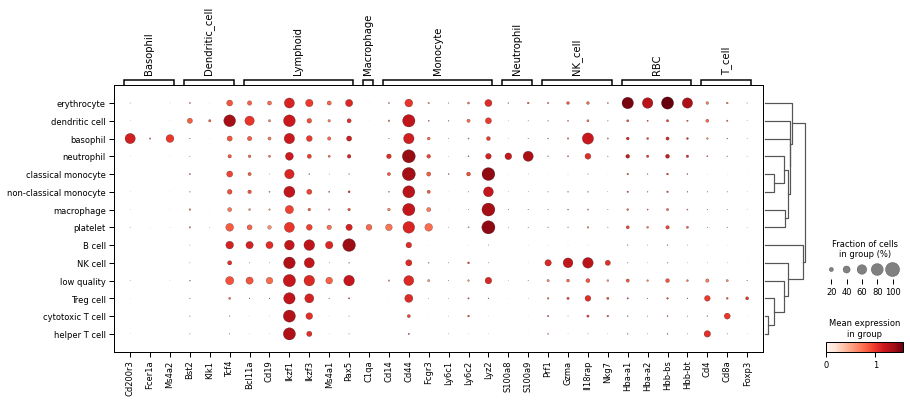

In [48]:
pbmc_marker_genes_dict = {
    "Basophil": ["Cd200r3", "Fcer1a", "Ms4a2"],
    "Dendritic_cell": ["Bst2", "Klk1", "Tcf4"],
    "Lymphoid": ["Bcl11a", "Cd19", "Ikzf1", "Ikzf3", "Ms4a1", "Pax5"],
    "Macrophage": ["C1qa"],
    "Monocyte": ["Cd14", "Cd44", "Fcgr3", "Ly6c1", "Ly6c2", "Lyz2"],
    "Neutrophil": ["S100a8", "S100a9"],
    "NK_cell": ["Prf1", "Gzma", "Il18rap", "Nkg7"],
    "RBC": ["Hba-a1", "Hba-a2", "Hbb-bs", "Hbb-bt"],
    "T_cell": ["Cd4", "Cd8a", "Foxp3"]
}

sc.pl.dotplot(adata, pbmc_marker_genes_dict, 'subtype', mean_only_expressed = True,
              dendrogram=True, log=True)


In [50]:
adata.obs.drop(columns='celltype_carryover', inplace=True)
adata.obs.drop(columns='subtype_carryover', inplace=True)


In [52]:
adata

AnnData object with n_obs × n_vars = 424071 × 56953
    obs: 'lab_sample_id', 'sample', 'plate', 'subpool', 'SampleType', 'Tissue', 'Sex', 'Age', 'Genotype', 'subpool_type', 'Protocol', 'Chemistry', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'bc1_well', 'bc2_well', 'bc3_well', 'Row', 'Column', 'well_type', 'Mouse_Tissue_ID', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'ZT', 'Dissector', 'Tissue_weight_mg', 'Notes', 'n_genes_by_counts_raw', 'total_counts_raw', 'total_counts_mt_raw', 'pct_counts_mt_raw', 'n_genes_by_counts_cb', 'total_counts_cb', 'total_counts_mt_cb', 'pct_counts_mt_cb', 'doublet_score', 'predicted_doublet', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'leiden', 'leiden_R', 'general_celltype', 'general_CL_ID', 'celltype', 'CL_ID', 'subtype'
    var: 'gene_id', 'gene_name', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_R', 'log1

In [51]:
meta = adata.obs
meta.to_csv(f"../IGVF_analysis/cellbender_tissues/obs_tables/{tissue}_annotated_metadata.csv")


In [53]:
adata.write_h5ad(f'../IGVF_analysis/cellbender_tissues/{tissue}_annotated.h5ad')
